## Assignment 1 - Question 2
SPPH 500 - Ly Trinh

In [1]:
library(tidyverse)
library(stats)
# library(GGally) #not that useful

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### Question 2
In this question, we will examine salary discrimination amongst tenure-track professors in a small Mid-western college in the United States.  The data consists of information on 52 faculty members, and were initially collected for presentation in legal proceedings for which discrimination against women in salary was at issue (recorded some time prior to 1980).  The data were collected from personnel files, and consist of the following variables (note, some variables have been removed from the dataset we will work with).  The data is saved in the file SalaryData.txt 
 
sex = recorded as “male” and “female” /
degree = the highest degree obtained, recorded as “doctorate” and “masters” /
yearsdeg = the number of years since the degree was earned /
salary = academic salary in U.S. dollars /
rank = academic rank, recorded as “full”, “associate” and “assistant”
 
In question 2, we will work through an analysis of this data.  In question 3, we will write up the findings.   

In [2]:
SalaryData <- read.delim('./SalaryData.txt', header=T, sep="")
head(SalaryData)

sex,degree,yearsdeg,salary,rank
male,doctorate,35,36350,full
male,doctorate,22,35350,full
male,doctorate,23,28200,full
female,doctorate,27,26775,full
male,masters,30,33696,full
male,doctorate,21,28516,full


#### (a)  Initial variable examination: 
Examine each variable on its own.  Examine all relevant bivariate relationships.  You do NOT need to include this with your submitted-assignment, but you should examine the data a bit before getting started on analysis. 

In [3]:
summary(SalaryData)

     sex           degree      yearsdeg         salary             rank   
 female:14   doctorate:36   Min.   : 1.00   Min.   :15000   assistant:17  
 male  :38   masters  :16   1st Qu.: 7.00   1st Qu.:19169   associate:15  
                            Median :15.00   Median :23713   full     :20  
                            Mean   :16.29   Mean   :23957                 
                            3rd Qu.:23.25   3rd Qu.:27259                 
                            Max.   :35.00   Max.   :38045                 

In [14]:
# summaries for degree
tab1 <- with(SalaryData, table(sex, degree))
tab1
prop.table(tab1, 1)

        degree
sex      doctorate masters
  female        10       4
  male          26      12

        degree
sex      doctorate   masters
  female 0.7142857 0.2857143
  male   0.6842105 0.3157895

In [16]:
# summaries for rank
tab2 <- with(SalaryData, table(sex, rank))
tab2
prop.table(tab2, 1)

        rank
sex      assistant associate full
  female         8         2    4
  male           9        13   16

        rank
sex      assistant associate      full
  female 0.5714286 0.1428571 0.2857143
  male   0.2368421 0.3421053 0.4210526

In [19]:
# summaries for yearsdeg and salary
with(SalaryData, by(yearsdeg, sex, mean))
with(SalaryData, by(yearsdeg, sex, sd))

sex: female
[1] 15.5
------------------------------------------------------------ 
sex: male
[1] 16.57895

sex: female
[1] 11.9083
------------------------------------------------------------ 
sex: male
[1] 9.451531

In [21]:
with(SalaryData, by(salary, sex, mean))
with(SalaryData, by(salary, sex, sd))

sex: female
[1] 21706.43
------------------------------------------------------------ 
sex: male
[1] 24786.13

sex: female
[1] 5923.151
------------------------------------------------------------ 
sex: male
[1] 5558.507

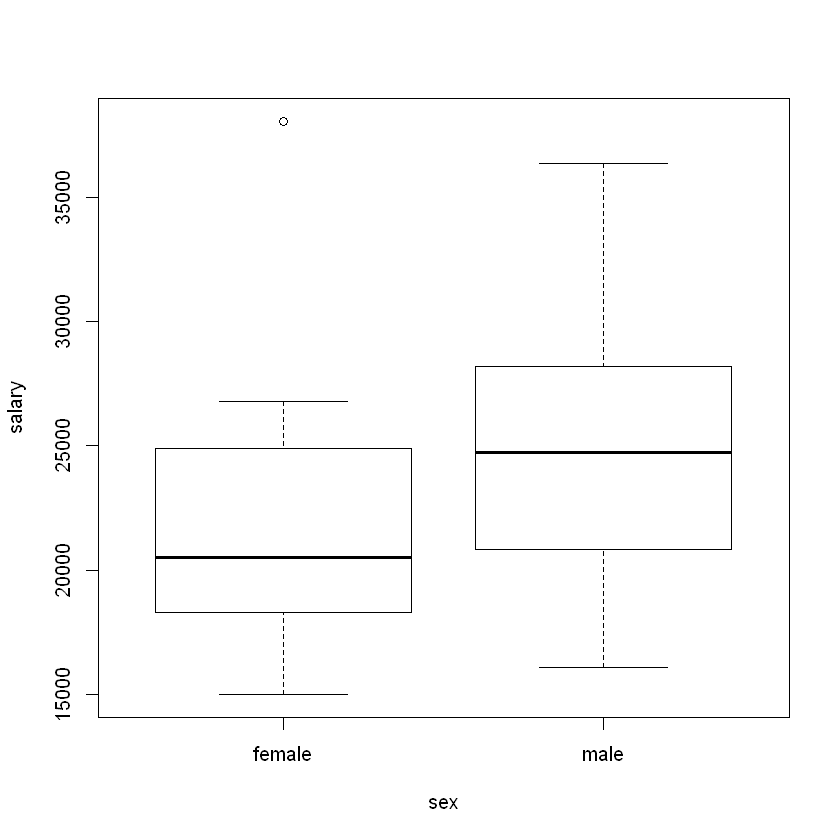

In [17]:
boxplot(salary~sex, data=SalaryData)

In [7]:
with(SalaryData, by(salary, sex, mean))

sex: female
[1] 21706.43
------------------------------------------------------------ 
sex: male
[1] 24786.13

In [8]:
with(SalaryData, by(salary, sex, sd))

sex: female
[1] 5923.151
------------------------------------------------------------ 
sex: male
[1] 5558.507

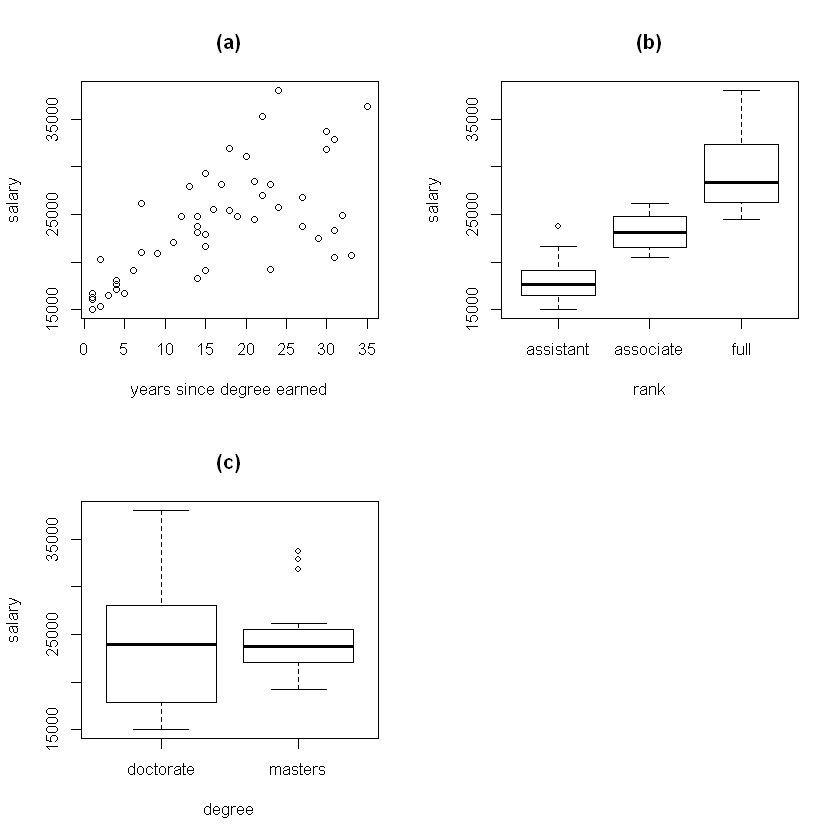

In [10]:
#pairwise plots with salary
par(mfrow=c(2,2))
plot(salary~yearsdeg, data=SalaryData, xlab="years since degree earned", main="(a)")
boxplot(salary~rank,data=SalaryData, main="(b)")
boxplot(salary~degree, data=SalaryData, main="(c)")
par(mfrow=c(1,1))

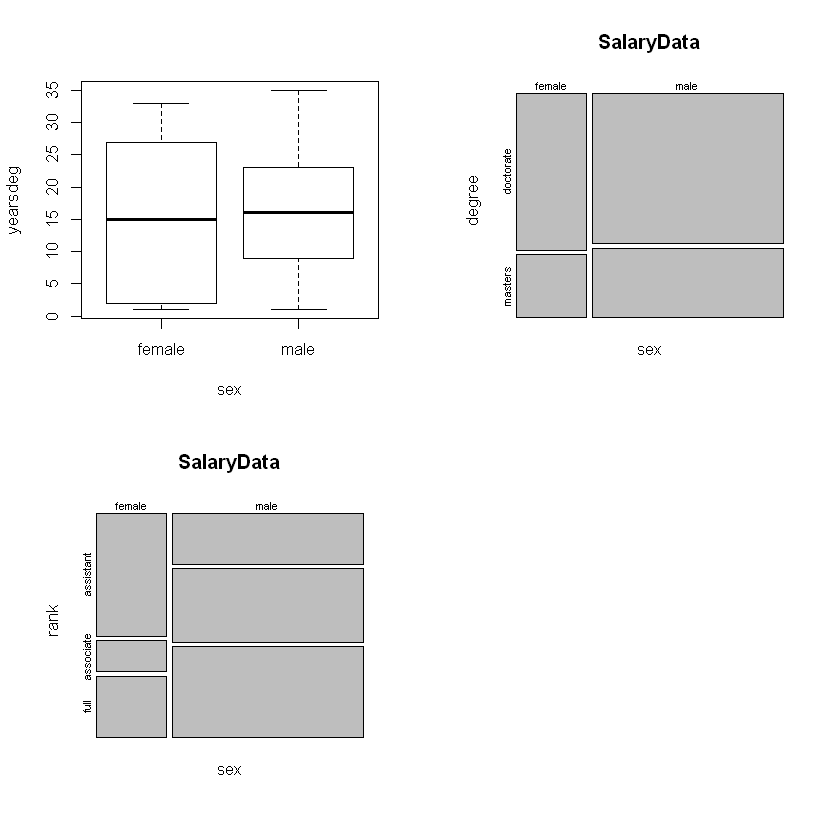

In [11]:
#plots between pairs of predictors
par(mfrow=c(2,2))
boxplot(yearsdeg~sex, data=SalaryData)
mosaicplot(sex~degree, data=SalaryData)
mosaicplot(sex~rank, data=SalaryData)
par(mfrow=c(1,1))

Sex assoc w/ rank. Yearsdeg assoc w/ rank and degree.


Years since degree earned and degree don't seem to differ by sex.

#### (b) Unadjusted effect

In [22]:
#t-test of salary by sex
x <- t.test(salary~sex, data=SalaryData)
x


	Welch Two Sample t-test

data:  salary by sex
t = -1.6904, df = 21.991, p-value = 0.1051
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6858.0335   698.6275
sample estimates:
mean in group female   mean in group male 
            21706.43             24786.13 


In [23]:
#difference in group means
diff(x$estimate)

mean in group male 
          3079.703

#### (c) Adjusted effect
Fit a model to test if the mean salary for the sexes differs, adjusting for degree, years since degree and rank.  What do you conclude here? 

In [24]:
fit1 <- lm(salary~., data=SalaryData)
summary(fit1)


Call:
lm(formula = salary ~ ., data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5079.4 -1635.0  -520.8  1777.4  9026.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16763.49    1040.91  16.105  < 2e-16 ***
sexmale         994.17    1012.02   0.982   0.3311    
degreemasters  -139.06    1215.99  -0.114   0.9095    
yearsdeg        114.92      75.93   1.514   0.1370    
rankassociate  3414.63    1341.41   2.546   0.0143 *  
rankfull       9497.37    1603.40   5.923 3.77e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2970 on 46 degrees of freedom
Multiple R-squared:  0.7608,	Adjusted R-squared:  0.7348 
F-statistic: 29.26 on 5 and 46 DF,  p-value: 3.123e-13


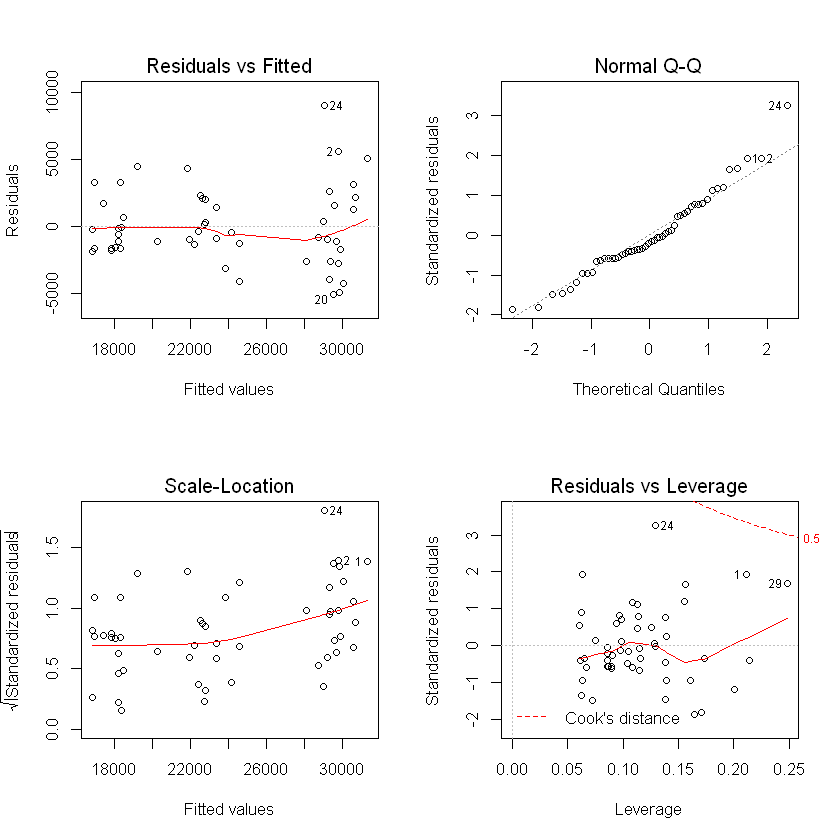

In [25]:
par(mfrow=c(2,2))
plot(fit1)
par(mfrow=c(1,1))

#### (d) Variables to Include: 
Recall, our question of interest is whether or not there exists a difference in mean salaries for males and females.  Compare a model that uses only the variable ‘sex’ to a model that uses ‘sex’ and ‘yearsdeg’.  Do you believe the variable ‘yearsdeg’ should be included in the model?  Make sure to justify your answer.   

In [26]:
fit2a <- lm(salary~sex, data=SalaryData)
summary(fit2a)


Call:
lm(formula = salary ~ sex, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8692.1 -3824.4  -221.3  3413.9 16338.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    21706       1512  14.361   <2e-16 ***
sexmale         3080       1768   1.742   0.0877 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5656 on 50 degrees of freedom
Multiple R-squared:  0.0572,	Adjusted R-squared:  0.03835 
F-statistic: 3.034 on 1 and 50 DF,  p-value: 0.0877


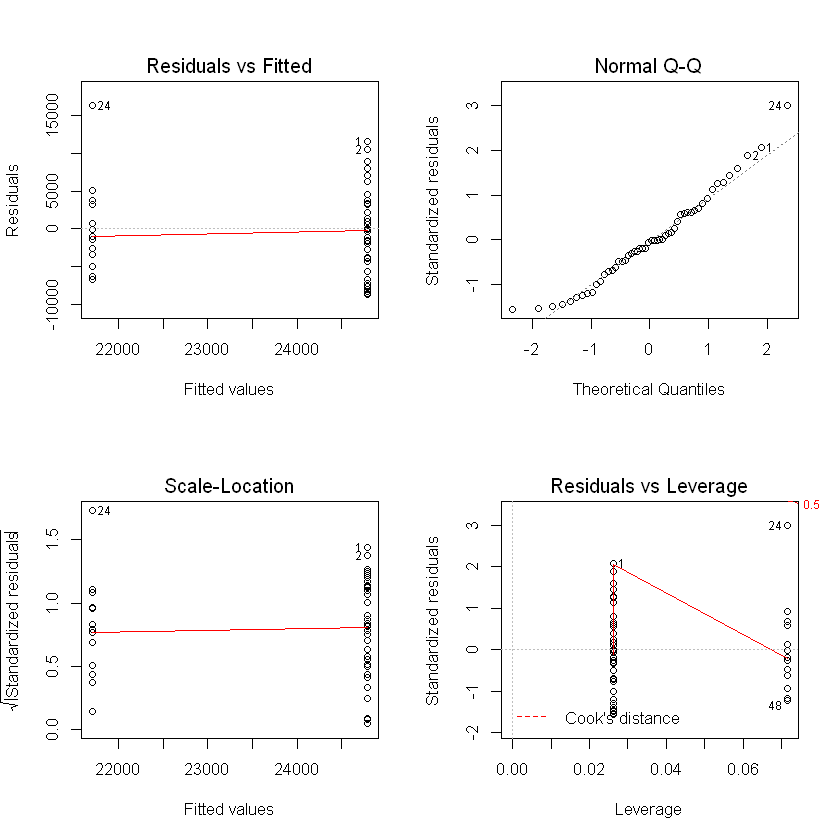

In [27]:
par(mfrow=c(2,2))
plot(fit2a)
par(mfrow=c(1,1))

In [28]:
fit2b <- update(fit2a, ~. + yearsdeg)
summary(fit2b)


Call:
lm(formula = salary ~ sex + yearsdeg, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9628.4 -2564.3  -167.6  2237.4 13175.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15937.54    1461.30  10.906 1.04e-14 ***
sexmale      2678.13    1331.01   2.012   0.0497 *  
yearsdeg      372.19      59.26   6.280 8.64e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4252 on 49 degrees of freedom
Multiple R-squared:  0.4777,	Adjusted R-squared:  0.4563 
F-statistic:  22.4 on 2 and 49 DF,  p-value: 1.23e-07


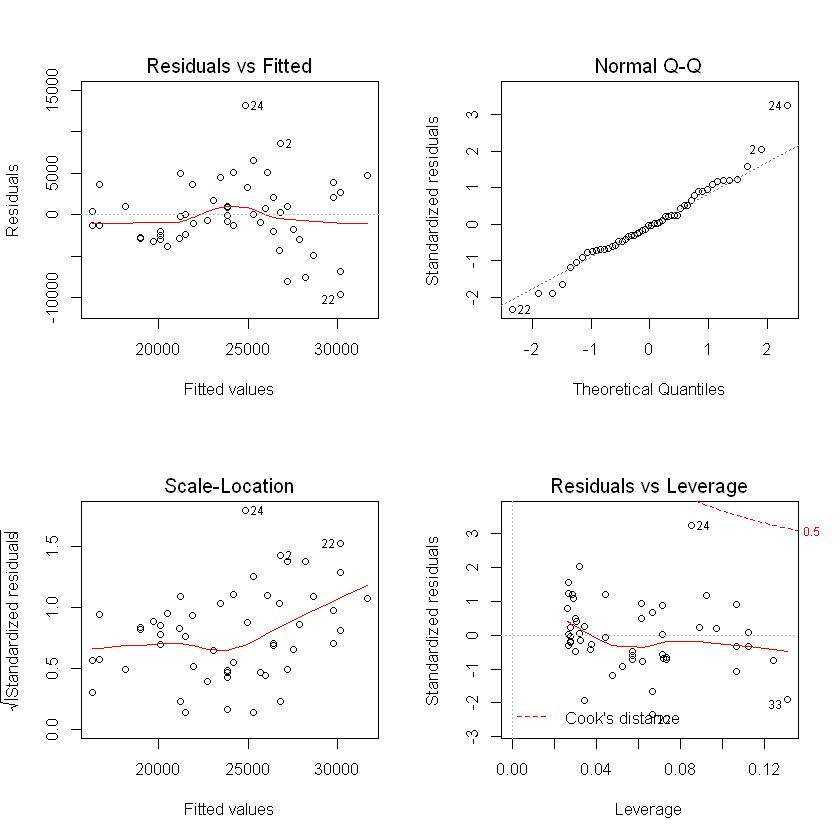

In [29]:
par(mfrow=c(2,2))
plot(fit2b)
par(mfrow=c(1,1))

In [30]:
anova(fit2a, fit2b)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
50,1599277132,NA,NA,NA,NA
49,886056860,1,713220272,39.44193,8.642331e-08


#### (e)  Variables to Include: 
Consider adding the variable ‘degree’ to the model that includes sex and yearsdeg.  Do you think this variable should be added into our model?  Why or why not? 

In [31]:
# model with degree is in part (f). No need to add here.

#### (f) Multiple Regression Model:  
Regardless of your findings from the previous questions, we will now work with a model that includes the variables ‘sex’, ‘yearsdeg’ and ‘degree’ as explanatory/predictor variables.  Fit this model, and report and interpret the regression coefficient for the variable ‘sex’, as well as a 95% confidence interval for it.  Also, report and interpret the coefficient of determination. 

In [32]:
fit3 <- update(fit2b, ~ . + degree)
summary(fit3)


Call:
lm(formula = salary ~ sex + yearsdeg + degree, data = SalaryData)

Residuals:
   Min     1Q Median     3Q    Max 
 -8249  -2601   -969   2920  11211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15608.20    1366.04  11.426 2.70e-15 ***
sexmale        2696.26    1239.97   2.174  0.03463 *  
yearsdeg        467.72      64.24   7.281 2.73e-09 ***
degreemasters -4030.23    1385.58  -2.909  0.00548 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3961 on 48 degrees of freedom
Multiple R-squared:  0.5559,	Adjusted R-squared:  0.5282 
F-statistic: 20.03 on 3 and 48 DF,  p-value: 1.47e-08


In [33]:
confint(fit3)

,2.5 %,97.5 %
(Intercept),12861.6028,18354.8045
sexmale,203.1353,5189.3917
yearsdeg,338.5600,596.8875
degreemasters,-6816.1165,-1244.3353


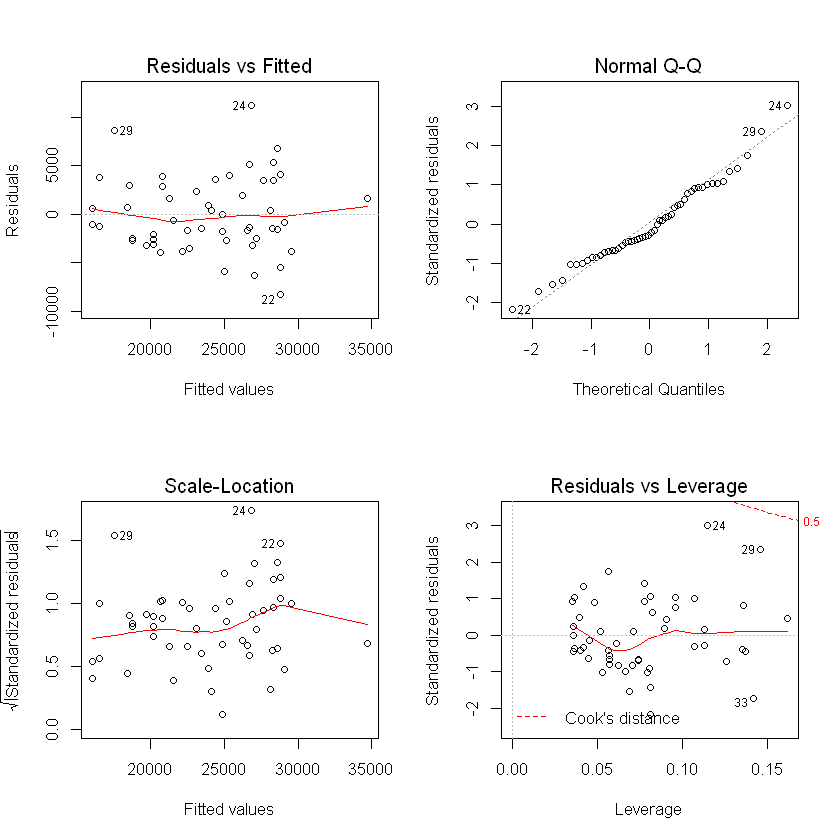

In [34]:
par(mfrow=c(2,2))
plot(fit3)
par(mfrow=c(1,1))
#linear, but not equal variance or normal

#### (g)  Effect Modifiers:  
Fit and compare models, to decide if the effect of the variable ‘sex’ on ‘salary’ is modified by either ‘yearsdeg’ or ‘degree’.  Summarize your findings in a neat and concise way, and state which, if any, effect modification (interaction) terms you believe should be included in the model, and why. 

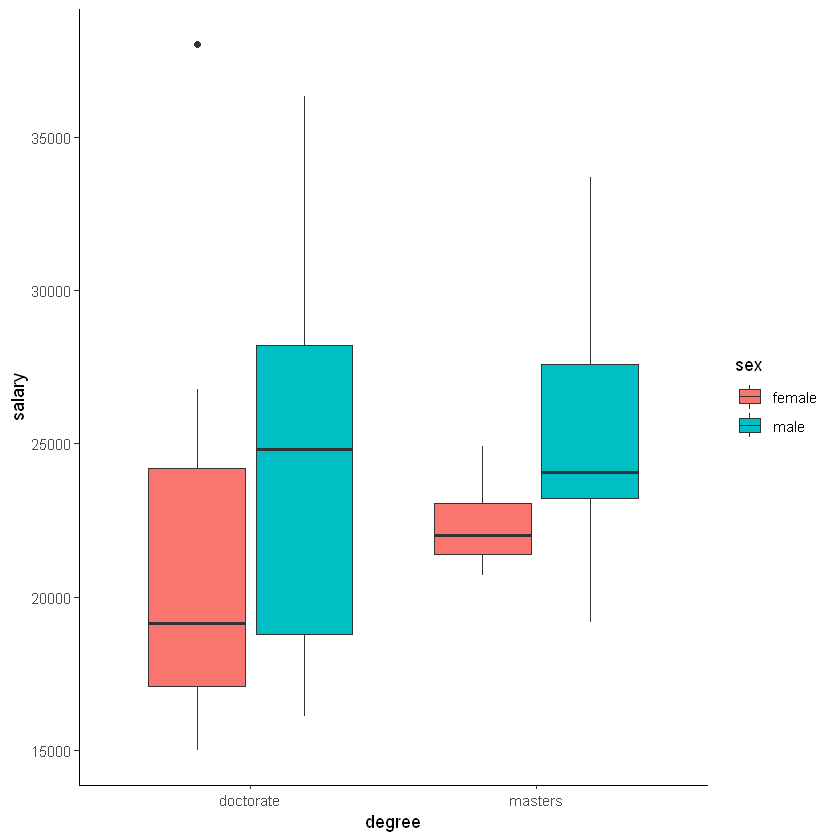

In [35]:
SalaryData %>%
ggplot() +
geom_boxplot(aes(degree, salary, fill=sex)) +
theme_classic()
#salaries are more different between sexes in masters?

`geom_smooth()` using formula 'y ~ x'


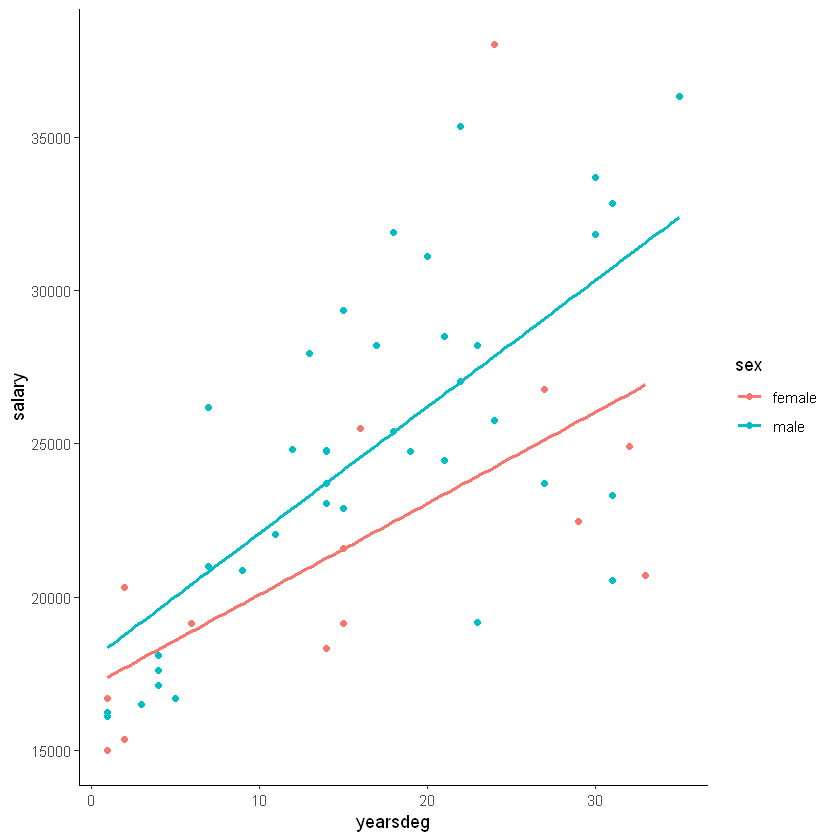

In [36]:
#checking sex-yearsdeg interation
SalaryData %>%
    ggplot(aes(yearsdeg, salary, color=sex))+
    geom_point()+
    geom_smooth(method="lm", se=F)+
    theme_classic()
#seems like there's an interaction, not sure if significant

In [37]:
#new linear models with interaction terms
#MLR with sex:degree interaction
fit4_deg <- update(fit3, ~. + sex:degree)
summary(fit4_deg)


Call:
lm(formula = salary ~ sex + yearsdeg + degree + sex:degree, data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9010.3 -2200.4  -482.7  2489.4 10245.9 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           16209.83    1424.65  11.378 4.22e-15 ***
sexmale                1592.65    1473.16   1.081  0.28516    
yearsdeg                482.89      64.65   7.469 1.59e-09 ***
degreemasters         -6958.47    2555.08  -2.723  0.00904 ** 
sexmale:degreemasters  3721.84    2738.42   1.359  0.18059    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3927 on 47 degrees of freedom
Multiple R-squared:  0.5727,	Adjusted R-squared:  0.5364 
F-statistic: 15.75 on 4 and 47 DF,  p-value: 3.033e-08


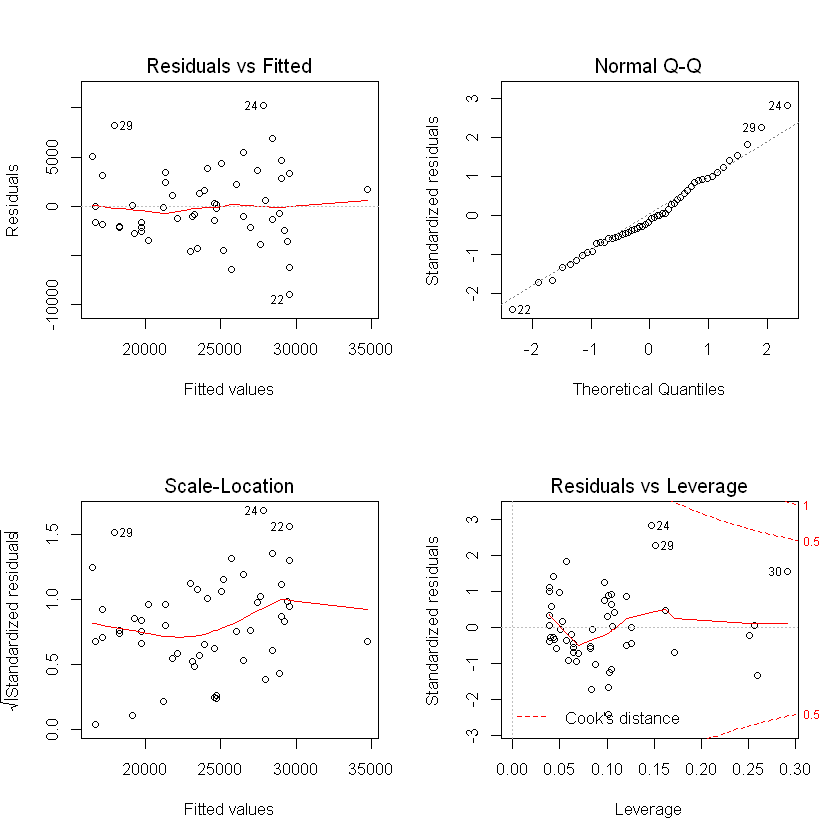

In [38]:
par(mfrow=c(2,2))
plot(fit4_deg)
par(mfrow=c(1,1))

In [39]:
#MLR with sex:yearsdeg interaction
fit4_years <- update(fit3, ~. + sex:yearsdeg)
summary(fit4_years)


Call:
lm(formula = salary ~ sex + yearsdeg + degree + sex:yearsdeg, 
    data = SalaryData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8801.5 -2100.4  -611.4  2874.0 11800.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      16649.14    1789.27   9.305 3.11e-12 ***
sexmale           1039.64    2215.31   0.469 0.641027    
yearsdeg           399.79      98.99   4.039 0.000197 ***
degreemasters    -3988.14    1389.03  -2.871 0.006115 ** 
sexmale:yearsdeg   104.27     115.44   0.903 0.371023    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3969 on 47 degrees of freedom
Multiple R-squared:  0.5635,	Adjusted R-squared:  0.5264 
F-statistic: 15.17 on 4 and 47 DF,  p-value: 4.933e-08


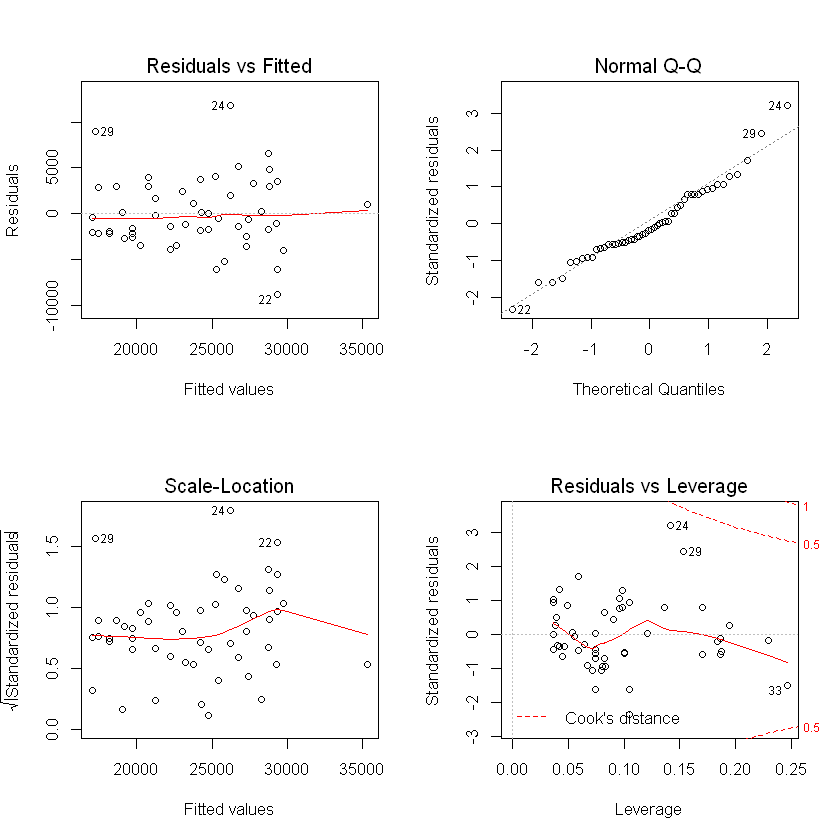

In [40]:
par(mfrow=c(2,2))
plot(fit4_years)
par(mfrow=c(1,1))

In [41]:
AIC(fit4_deg)
AIC(fit4_years)

[1] 1014.978

[1] 1016.088

In [42]:
BIC(fit4_deg)
BIC(fit4_years)

[1] 1026.685

[1] 1027.795

Both models still violate the homocedasticity and normality assumptions and neither explains the variability in salaries very well (only 56-57%). 

In [43]:
anova(fit3, fit4_deg)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
48,753282637,NA,NA,NA,NA
47,724796401,1,28486236,1.847213,0.1805942


In [44]:
anova(fit3, fit4_years)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
48,753282637,NA,NA,NA,NA
47,740430966,1,12851671,0.8157797,0.371023


The interaction term is insignificant in both models and there is hardly any increase in R-squared. Model violations are not corrected. We stick with the model 3, without any interaction.

#### (h) Final model

Now that we have decided on a final model, state the regression assumptions, and whether or not you think they are met.   Make sure to justify your answers. For any assumption that is not met, state what we might consider trying in order to “fix the problem”.  You do not have to carry through with making these changes in order to satisfy assumptions.  You may simply state what changes we might consider making.

In [45]:
# final model: fit3
summary(fit3)


Call:
lm(formula = salary ~ sex + yearsdeg + degree, data = SalaryData)

Residuals:
   Min     1Q Median     3Q    Max 
 -8249  -2601   -969   2920  11211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15608.20    1366.04  11.426 2.70e-15 ***
sexmale        2696.26    1239.97   2.174  0.03463 *  
yearsdeg        467.72      64.24   7.281 2.73e-09 ***
degreemasters -4030.23    1385.58  -2.909  0.00548 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3961 on 48 degrees of freedom
Multiple R-squared:  0.5559,	Adjusted R-squared:  0.5282 
F-statistic: 20.03 on 3 and 48 DF,  p-value: 1.47e-08


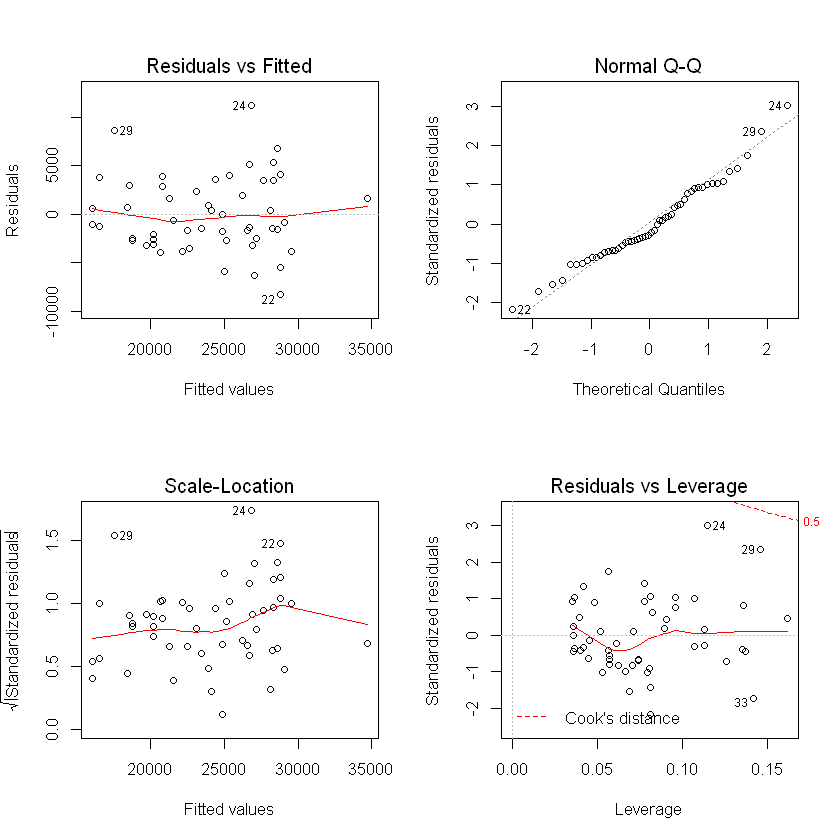

In [46]:
par(mfrow=c(2,2))
plot(fit3)
par(mfrow=c(1,1))

In [47]:
#normality test for residuals
shapiro.test(fit3$residuals)


	Shapiro-Wilk normality test

data:  fit3$residuals
W = 0.97391, p-value = 0.3073


In [48]:
#how to theoretically fix heteroscedasticity
# try log model
fit3b <- update(fit3, log(salary) ~ .)
summary(fit3b)


Call:
lm(formula = log(salary) ~ sex + yearsdeg + degree, data = SalaryData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34415 -0.11879 -0.02199  0.12793  0.38193 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.694454   0.054954 176.409  < 2e-16 ***
sexmale        0.120745   0.049883   2.421   0.0193 *  
yearsdeg       0.019589   0.002584   7.580 9.55e-10 ***
degreemasters -0.148911   0.055740  -2.672   0.0103 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1594 on 48 degrees of freedom
Multiple R-squared:  0.5827,	Adjusted R-squared:  0.5566 
F-statistic: 22.34 on 3 and 48 DF,  p-value: 3.38e-09


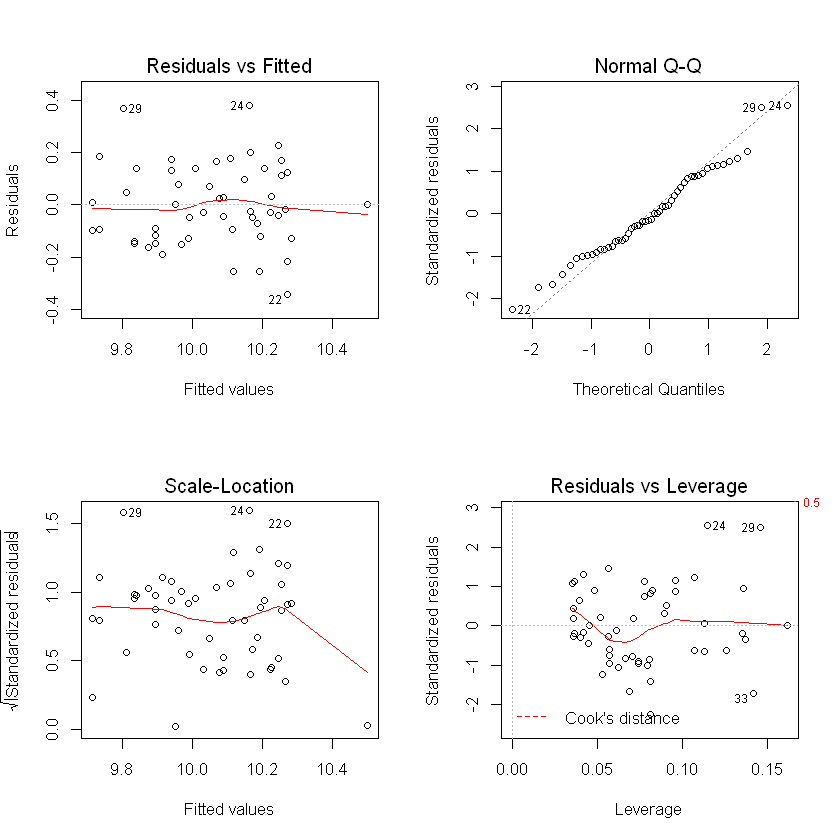

In [49]:
par(mfrow=c(2,2))
plot(fit3b)
par(mfrow=c(1,1))